In [106]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
reading_lists = pd.read_csv("./reading_lists.csv")
reading_lists['reading_list'] = reading_lists['reading_list'].apply(ast.literal_eval)

In [108]:
reading_lists

,id,title,abstract,year,url,venues,reading_list
0,C16-3001,Compositional Distributional Models of Meaning,Compositional distributional models of meaning...,2016,https://aclanthology.org/C16-3001/,COLING,[{'paperId': '37efe2ef1b9d27cc598361a8013ec888...
1,P19-4004,Computational Analysis of Political Texts: Bri...,"In the last twenty years, political scientists...",2019,https://aclanthology.org/P19-4004/,ACL,[{'paperId': 'b9921fb4d1448058642897797e77bdaf...
2,2020.acl-tutorials.1,Interpretability and Analysis in Neural NLP,While deep learning has transformed the natura...,2020,https://aclanthology.org/2020.acl-tutorials.1,ACL,[{'paperId': '668f42a4d4094f0a66d402a16087e142...
3,2020.acl-tutorials.2,Integrating Ethics into the NLP Curriculum,To raise awareness among future NLP practition...,2020,https://aclanthology.org/2020.acl-tutorials.2,ACL,[{'paperId': '0e661bd2cfe94ed58e4e2abc1409c75b...
4,2020.acl-tutorials.3,Achieving Common Ground in Multi-modal Dialogue,All communication aims at achieving common gro...,2020,https://aclanthology.org/2020.acl-tutorials.3,ACL,[{'paperId': '5a9cac54de14e58697d0315fe3c01f3d...
...,...,...,...,...,...,...,...
80,2024.lrec-tutorials.11,Tutorial Proposal: Hallucination in Large Lang...,In the fast-paced domain of Large Language Mod...,2024,https://aclanthology.org/2024.lrec-tutorials.11,LREC,[{'paperId': 'd00735241af700d21762d2f3ca00d920...
81,2024.lrec-tutorials.13,Knowledge-enhanced Response Generation in Dial...,This tutorial provides an in-depth exploration...,2024,https://aclanthology.org/2024.lrec-tutorials.13,LREC,[{'paperId': 'a6401e102c03a441992b3e45f7b63eec...
82,2024.naacl-tutorials.2,Combating Security and Privacy Issues in the E...,This tutorial seeks to provide a systematic su...,2024,https://aclanthology.org/2024.naacl-tutorials.2,NAACL,[{'paperId': '3a1f8829e641b46f661775f64a7f27b9...
83,2024.naacl-tutorials.4,From Text to Context: Contextualizing Language...,Aimed at the NLP researchers or practitioners ...,2024,https://aclanthology.org/2024.naacl-tutorials.4,NAACL,[{'paperId': 'bdb73be49c4fdcbd0c79ca62e5703155...


In [109]:
print((reading_lists['venues'] + ' '  + reading_lists['year'].astype(str)).unique())
len((reading_lists['venues'] + ' '  + reading_lists['year'].astype(str)).unique())

['COLING 2016' 'ACL 2019' 'ACL 2020' 'COLING 2020' 'EMNLP 2020'
 'ACL, IJCNLP 2021' 'EACL 2021' 'EMNLP 2021' 'NAACL 2021'
 'AACL, IJCNLP 2022' 'ACL 2022' 'EMNLP 2022' 'NAACL 2022' 'ACL 2023'
 'EACL 2023' 'EMNLP 2023' 'IJCNLP, AACL 2023' 'EACL 2024' 'LREC 2024'
 'NAACL 2024']


20

In [110]:
len(reading_lists["id"].unique())

85

In [111]:
reading_lists['reading_list']

0     [{'paperId': '37efe2ef1b9d27cc598361a8013ec888...
1     [{'paperId': 'b9921fb4d1448058642897797e77bdaf...
2     [{'paperId': '668f42a4d4094f0a66d402a16087e142...
3     [{'paperId': '0e661bd2cfe94ed58e4e2abc1409c75b...
4     [{'paperId': '5a9cac54de14e58697d0315fe3c01f3d...
                            ...                        
80    [{'paperId': 'd00735241af700d21762d2f3ca00d920...
81    [{'paperId': 'a6401e102c03a441992b3e45f7b63eec...
82    [{'paperId': '3a1f8829e641b46f661775f64a7f27b9...
83    [{'paperId': 'bdb73be49c4fdcbd0c79ca62e5703155...
84    [{'paperId': '529025645c70a935221bd434484faee6...
Name: reading_list, Length: 85, dtype: object

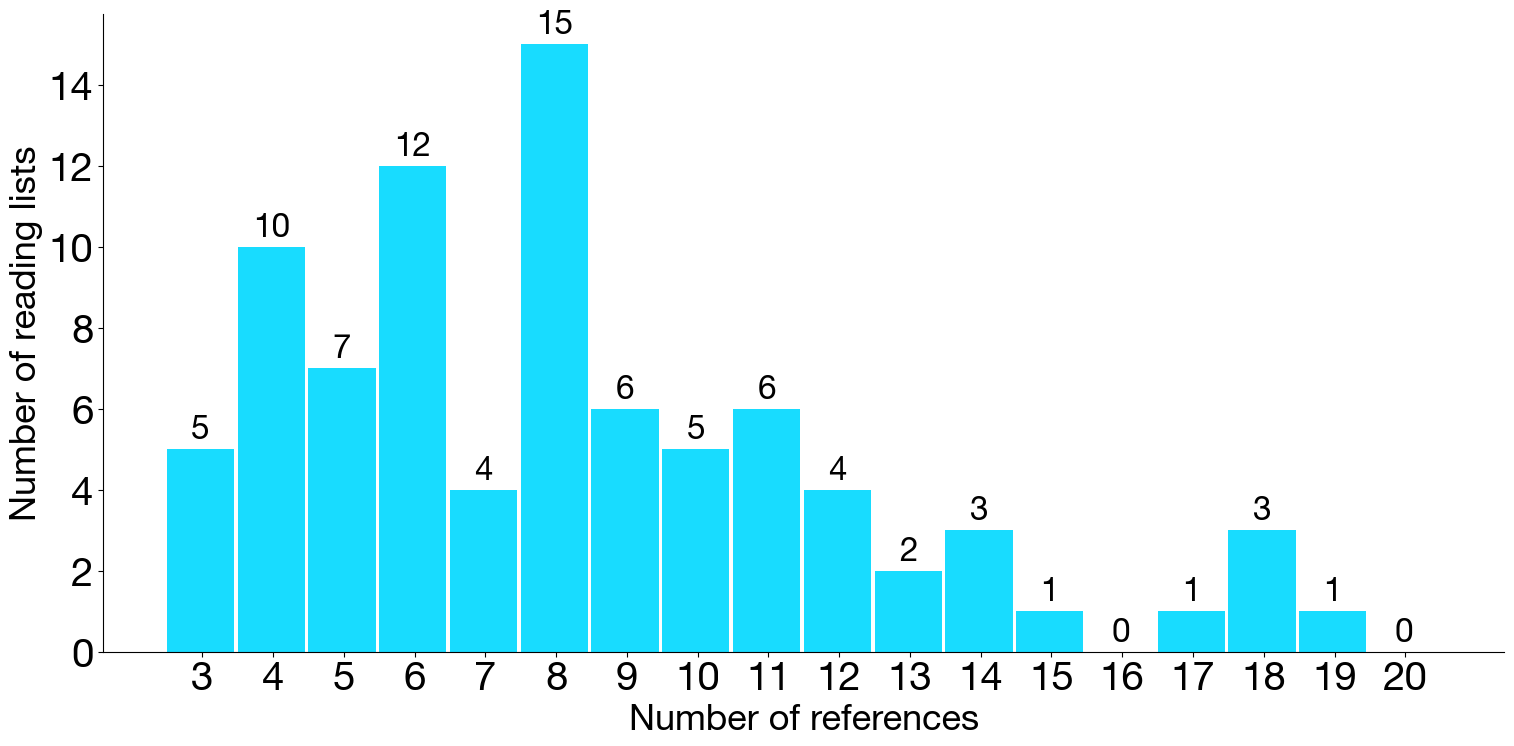

In [136]:
fig, ax = plt.subplots(figsize=(16,8))
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica Neue'],
    'font.size': 24,
    'axes.titlesize': 30,
    'xtick.labelsize': 28,
    'ytick.labelsize': 28,
    'legend.fontsize': 22
})

sizes = [len(v) for v in reading_lists['reading_list']]
counts, bins = np.histogram(sizes, bins=range(3,22))
ax.hist(bins[:-1], bins-0.5, weights=counts, align='mid', color=["#18dcff"], width=0.95)
ax.set_ylabel("Number of reading lists", fontsize=26)
ax.set_xlabel("Number of references", fontsize=26)
ax.set_xticks(range(3,21))

for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt="{:0.0f}", padding=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## References stats

In [113]:
#Avg references
sizes = []
for _, row in reading_lists.iterrows():
    sizes.append(len(row["reading_list"]))

print(np.mean(sizes))
print(np.min(sizes))
print(np.max(sizes))

8.24705882352941
3
19


In [114]:
for _, row in reading_lists.iterrows():
    for ref in row["reading_list"]:
        if "abstract" not in ref: 
            print(ref)
        if ref['abstract'] == '':
            print(ref)

{'paperId': '9ca5552008fe2c24e0541f6af47fd5110d4015b3', 'key': 'lastwordsreviewingthereviewersnone', 'acl_id': 'J05-4006', 'title': 'Last Words: Reviewing the Reviewers', 'abstract': '', 'year': 2005, 'section': None, 'subsection': None}
{'paperId': 'a772589606f9880d74ac79519ccef073eefd5519', 'key': 'doubleblindpeerreviewandgenderpublicationbias2008', 'acl_id': '', 'title': 'Double-blind peer review and gender publication bias', 'abstract': '', 'year': 2008, 'section': None, 'subsection': None}
{'paperId': '8d75051e8151fa5b7bd7c863102d0c4be7608c93', 'key': 'peerreviewreviewed2014', 'acl_id': '', 'title': 'Peer review — reviewed', 'abstract': '', 'year': 2014, 'section': None, 'subsection': None}
{'paperId': '830ab38207bd40189752a301967b865c38dab591', 'key': 'lastwordsbreakingnewschangingattitudesandpracticesnone', 'acl_id': 'J07-4009', 'title': 'Last Words: Breaking News: Changing Attitudes and Practices', 'abstract': '', 'year': 2007, 'section': None, 'subsection': None}
{'paperId': '

In [115]:
refs = []
unique_refs = []
for _, row in reading_lists.iterrows():
    for ref in row["reading_list"]:
        if ref not in unique_refs:
            unique_refs.append(ref)
        refs.append(ref)
print(len(refs))
len(unique_refs)

701


662

In [116]:
print(reading_lists[reading_lists["abstract"].isna()][["venues", "title"]])

          venues                                              title
67  IJCNLP, AACL  Current Status of NLP in South East Asia with ...


## Years of publication

2017.8504531722053
1977
2023
[1977 1979 1986 1991 1992 1994 1997 1999 2001 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023] [ 1  1  1  1  1  1  1  1  1  2  2  6  1  5  7  5 14  7  8 12 21 20 41 63
 65 84 97 76 68 49]


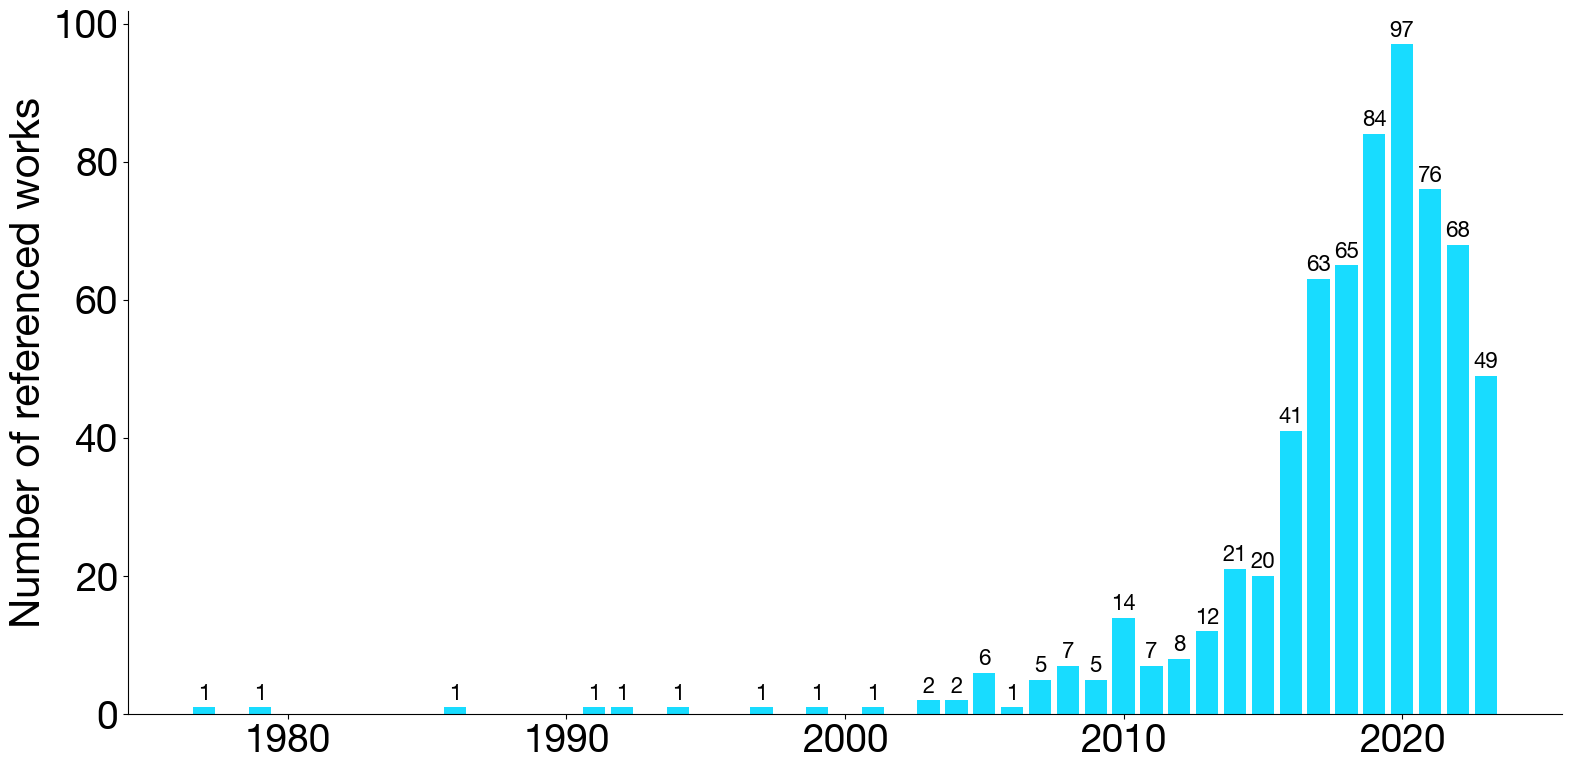

In [129]:
fig, ax = plt.subplots(figsize=(16,8))
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Helvetica Neue'],
    'font.size': 16,
    'axes.titlesize': 30,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'legend.fontsize': 30
})

years = []

for ref in unique_refs:
    years.append(ref["year"])
print(np.mean(years))
print(np.min(years))
print(np.max(years))

unique, counts = np.unique(years, return_counts=True)
print(unique, counts)

ax.bar(unique, counts, color=['#18dcff'])
ax.set_xlabel('')
ax.set_ylabel('Number of referenced works', fontsize=30)

for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt="{:0.0f}", padding=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

## Sections Stats

In [118]:
reading_lists_subs = pd.read_csv("./reading_lists_sections.csv")
reading_lists_subs['reading_list'] = reading_lists_subs['reading_list'].apply(ast.literal_eval)

# No section
print(len(reading_lists_subs[reading_lists_subs["section"].isna()]["id"].unique()))
# Section
print(len(reading_lists_subs[reading_lists_subs["section"].notna()]["id"].unique()))
# Subsection
print(len(reading_lists_subs[reading_lists_subs["subsection"].notna()]["id"].unique()))

58
27
3
